In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_blobs, make_circles

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


Forma de X: (1000, 2)
Forma de y: (1000,)


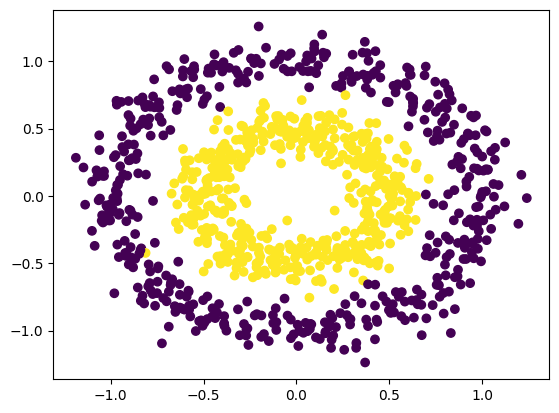

In [ ]:
#X,y = make_blobs(n_samples = 1000, centers = 2, n_features = 2,cluster_std = 1.5, random_state = 42)
X,y = make_circles(n_samples = 1000, noise = 0.1, factor = 0.5)

print('Forma de X:', X.shape)
print('Forma de y:', y.shape)

plt.scatter(X[:,0], X[:,1], c = y)
plt.show()

In [ ]:
Xtrain, Xvalid, ytrain, yvalid = train_test_split(X,y, test_size = 0.3, random_state = 42)

print('Forma de Xtrain', Xtrain.shape)
print('Forma de Xvalid', Xvalid.shape)
print('Forma de ytrain', ytrain.shape)
print('Forma de yvalid', yvalid.shape)




Forma de Xtrain (700, 2)
Forma de Xvalid (300, 2)
Forma de ytrain (700,)
Forma de yvalid (300,)


In [ ]:
neuronio = Sequential()
neuronio.add(Dense(1, input_shape = (2,), ))
neuronio.add(Activation('sigmoid'))

neuronio.compile(optimizer = 'sgd', loss = 'binary_crossentropy',
                 metrics = ['accuracy'])

neuronio.summary()

NameError: ignored

In [ ]:
r = neuronio.fit(Xtrain, ytrain, batch_size = 10,
                 epochs = 100,
                 validation_data = (Xvalid , yvalid))

In [ ]:
neuronio.evaluate(Xtrain,ytrain)

In [ ]:
neuronio.evaluate(Xvalid,yvalid)

In [ ]:
plt.plot(r.history['loss'])
plt.plot(r.history['val_loss'])
plt.xlabel('Épocas')
plt.ylabel('Accurácia')
plt.show()

In [ ]:
plt.plot(r.history['accuracy'])
plt.plot(r.history['val_accuracy'])
plt.xlabel('Épocas')
plt.ylabel('Erro de Entropia Cruzada')
plt.show()

In [ ]:
ypred = neuronio.predict(Xvalid)

print('Forma de ypred:', ypred.shape)

In [ ]:
ypred = np.round(ypred)

In [ ]:
accuracy_score(ypred, yvalid)

In [ ]:
xx, yy = np.meshgrid(np.linspace(-1.5, 1.5, 100),
                     np.linspace(-1.5, 1.5, 100))
Z = neuronio.predict(np.c_[xx.ravel(), yy.ravel()])
Z = np.round(Z)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha = 0.5)
plt.scatter(Xvalid[:,0], Xvalid[:,1], c= yvalid, edgecolor = 'black')
plt.show()